# Importing Libraries 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [16]:
df=pd.read_csv("HousingData.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.shape

(545, 13)

Our Dataset has 545 rows and 13 columns

In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Data Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
features = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

le = LabelEncoder()
df[features] = df[features].apply(le.fit_transform)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


Now all data is of integrer dtype

<Axes: >

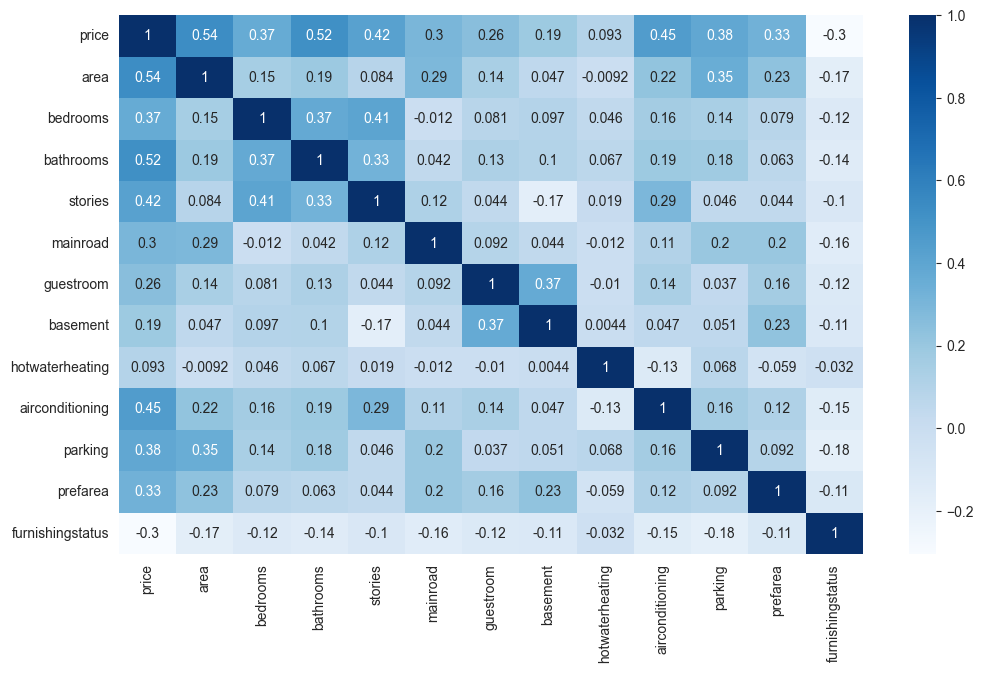

In [23]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='Blues',annot=True)

# Data Visualisation

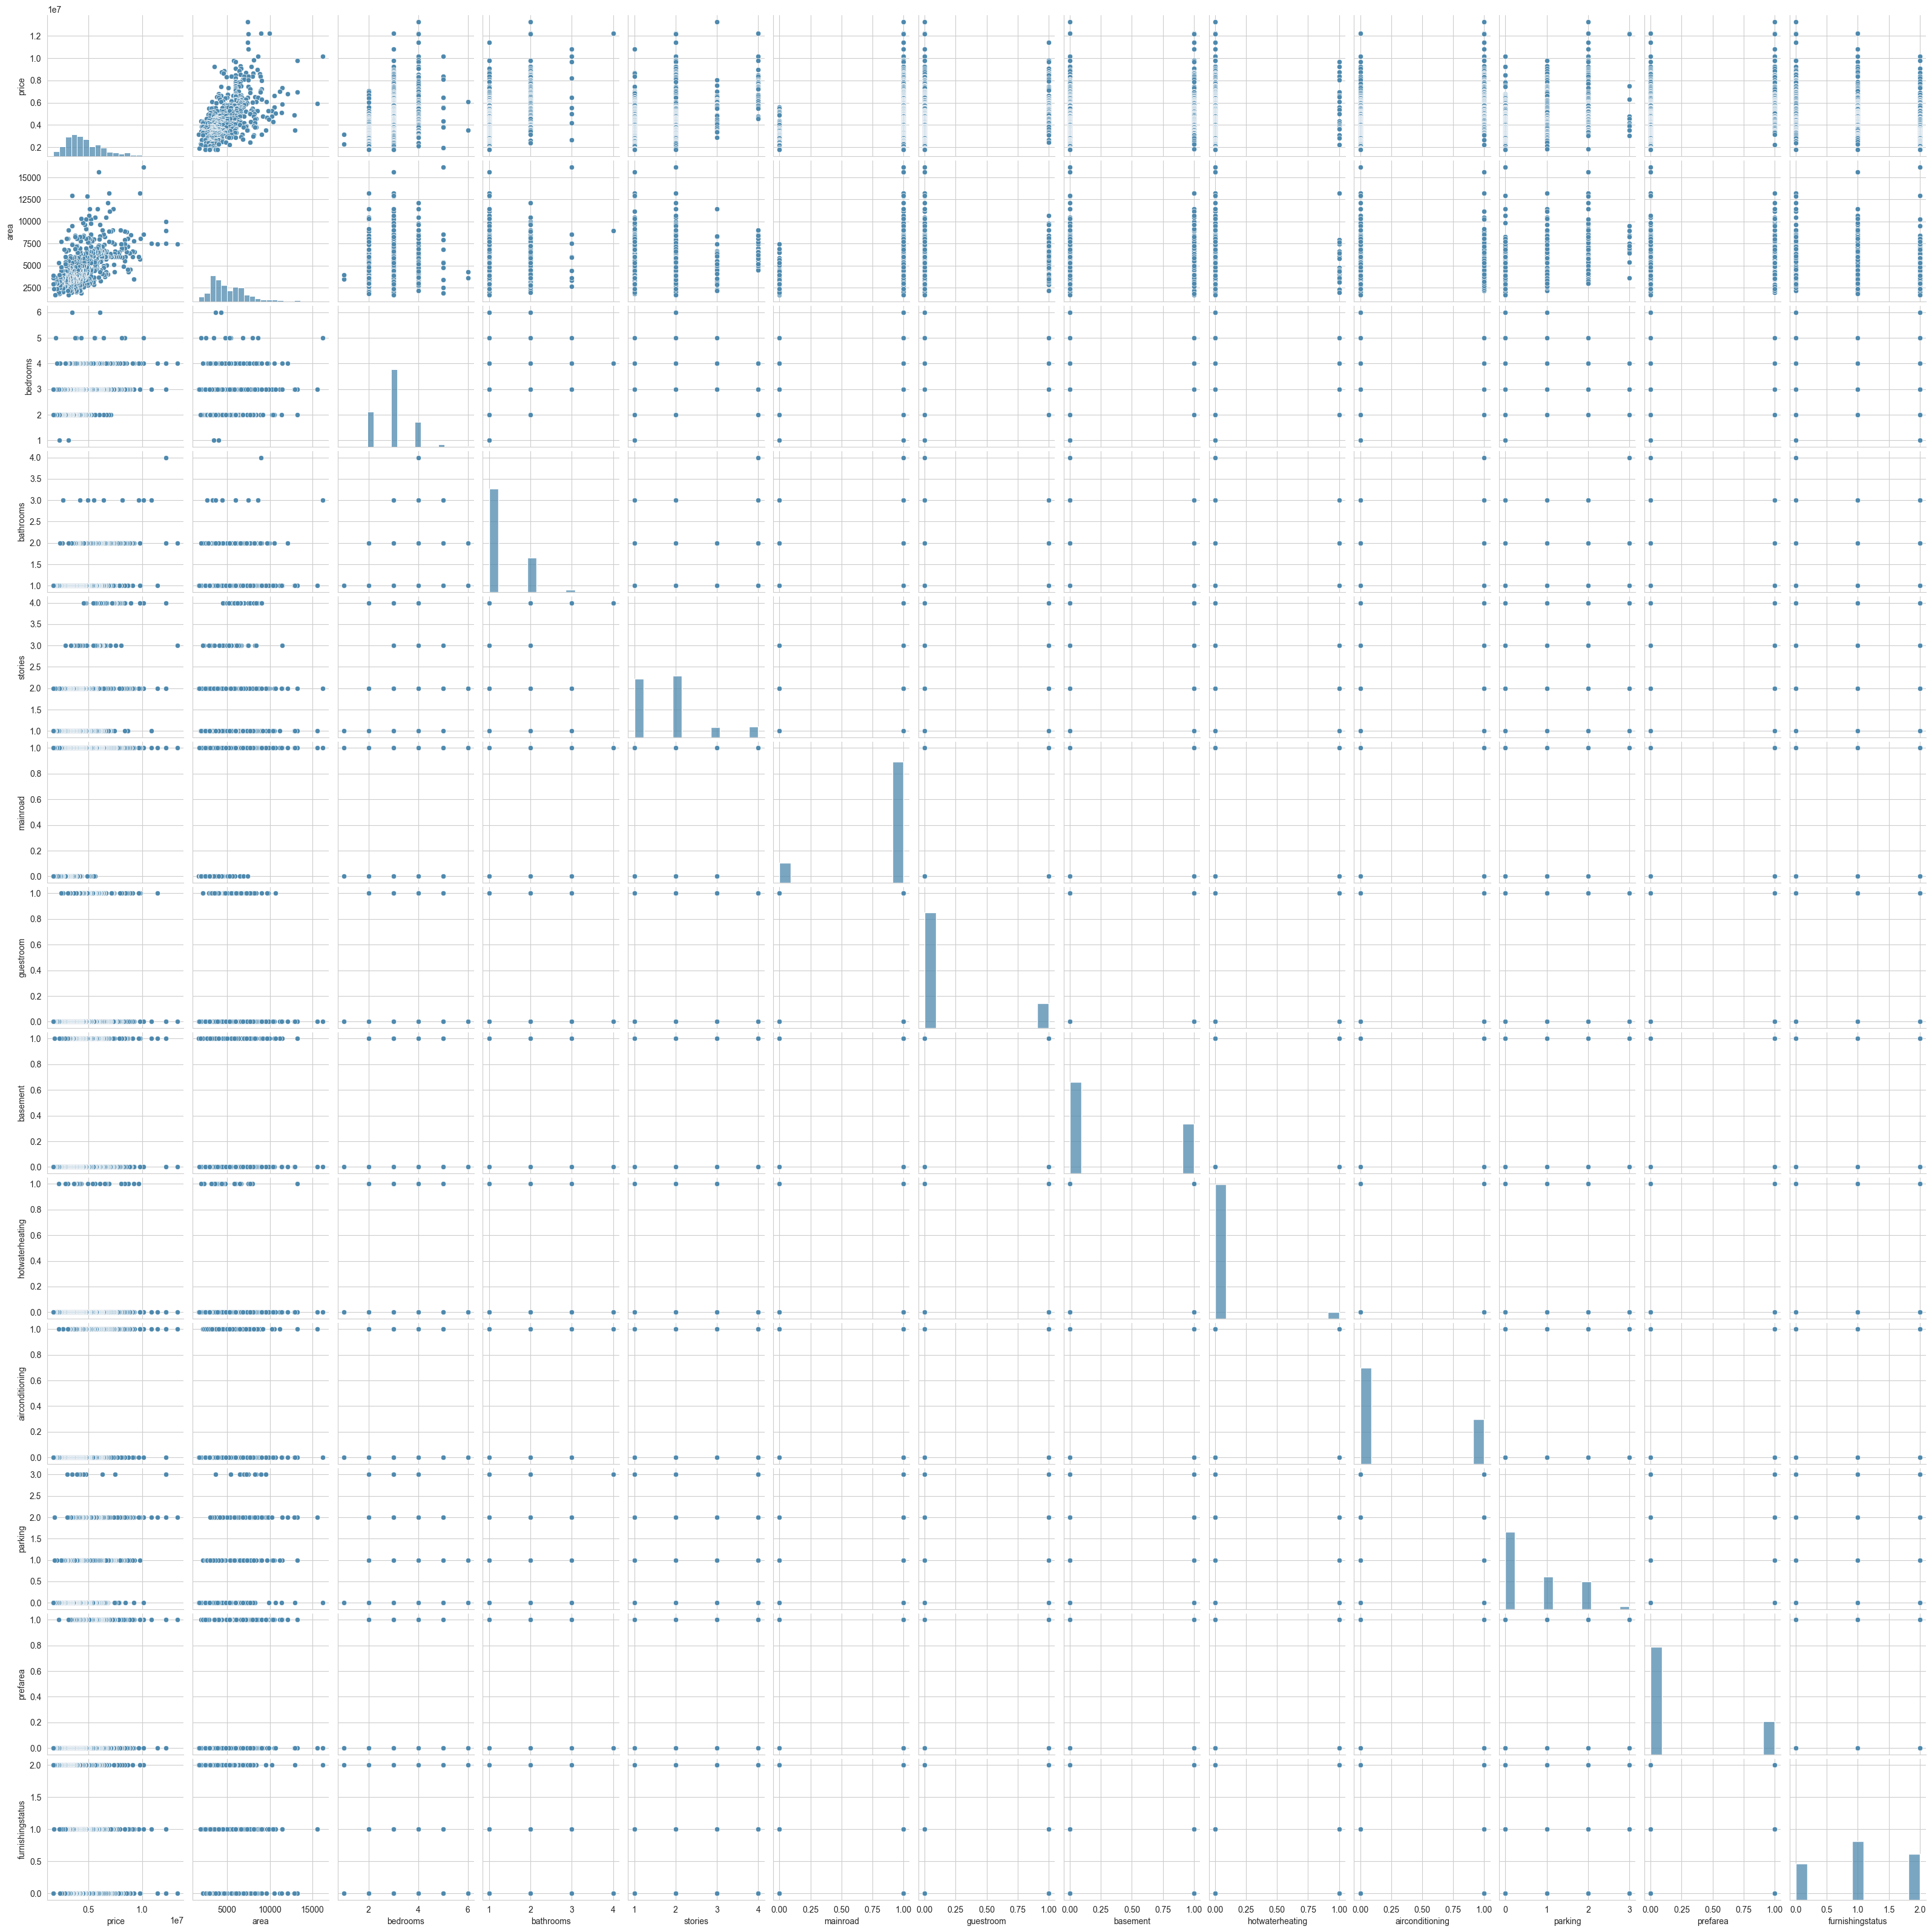

In [24]:
sns.pairplot(df)  
plt.show()            

In [25]:
import math
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx

from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

sns.set_style("whitegrid")

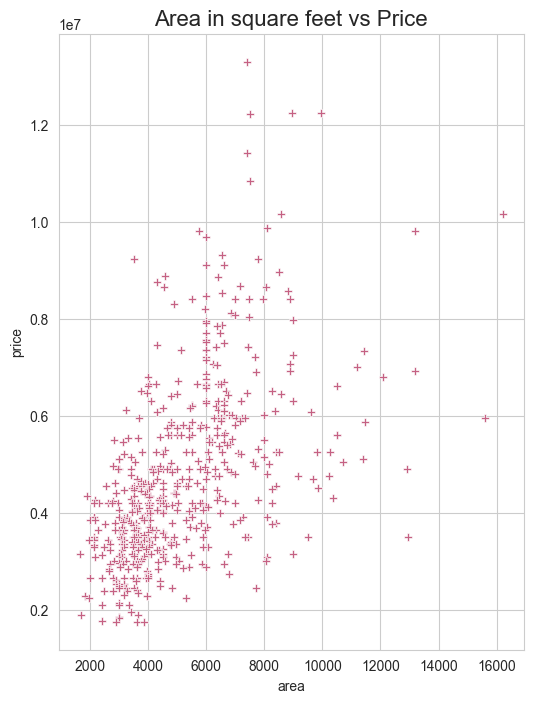

In [26]:
def scatter_plot(data,c):
    sns.scatterplot(x="area", y="price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price',size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()
scatter_plot(df,custom_colors[1])

In [27]:
figure = px.scatter(data_frame = df, 
                    x="area",
                    y="price", 
                    size="price", 
                    trendline="ols", 
                    title = "Price vs Area analysis")
figure.show()

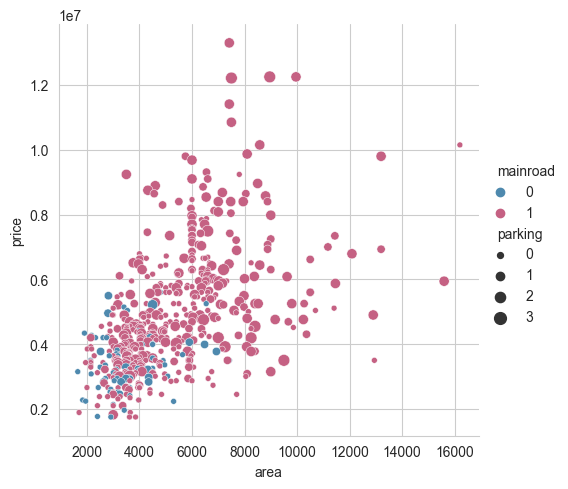

In [28]:
sns.relplot(x='area',y='price',hue='mainroad',size='parking',data=df)

# Splitting Dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [30]:
#Data Scaling

df_new = df.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

df_new[num_columns] = MinMaxScaler().fit_transform(df_new[num_columns])

df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


In [31]:
X = df.drop(['price'],axis=1)
y = df['price']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
len(X_train),len(X_test)

(408, 137)

# Model

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(X_test)

In [35]:
y_predict

array([5258901.38185144, 7235978.26767804, 3074804.23583165,
       4529833.40768993, 3334896.01433317, 3582738.80172692,
       5714243.9760778 , 6467048.23130885, 2835600.38875236,
       2660849.63108369, 9630459.37389798, 2842313.73261652,
       3185820.22397591, 3337108.41428338, 3710547.88871678,
       5378935.52640573, 2971407.75080161, 4822100.37745742,
       4420946.55161184, 3544903.37307763, 5727172.69682827,
       5883080.54651171, 2773957.48051698, 4829182.2944597 ,
       5336729.04157344, 7626687.64636574, 3313472.54946864,
       5289712.58575654, 8251940.93695112, 3418321.02376057,
       6444901.46074548, 3364669.02442553, 6760319.30470108,
       4150512.06584206, 3574340.45808844, 5818971.63009337,
       4870818.06284826, 4359955.31593047, 3200469.78833818,
       4637248.74391467, 4610986.65539388, 3536073.83412229,
       7216790.54779044, 4037836.79163614, 3724788.24702379,
       4336414.93399043, 6667050.22679661, 4008515.20067887,
       3829521.92083308,

# Evaluation

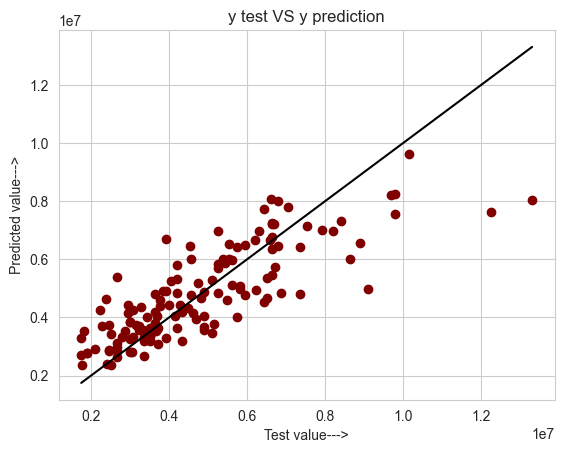

In [36]:
plt.scatter(y_test,y_predict, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y test VS y prediction')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [38]:
score

0.6614628548582817

In [39]:
mae

919520.6451757507